## 問題

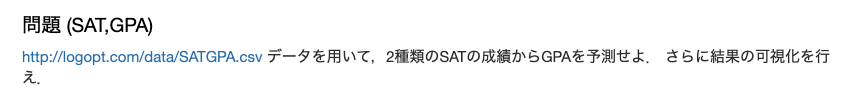

In [1]:
from IPython.display import Image
Image('sat-gpa.png')

## 解答

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SATGPA.csv', index_col=0)
df.head()

,MathSAT,VerbalSAT,GPA
1,580,420,2.90
2,670,530,2.83
3,680,540,2.90
4,630,640,3.30
5,620,630,3.61


In [4]:
X = df[['MathSAT', 'VerbalSAT']]
y = df['GPA']

print('X:\n', X.head(2), '\n')
print('y:\n', y.head(2))

X:
    MathSAT  VerbalSAT
1      580        420
2      670        530 

y:
 1    2.90
2    2.83
Name: GPA, dtype: float64


### 線形回帰

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [6]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [7]:
y_hat = pipe.fit(X, y).predict(X)
y_hat

array([2.97325626, 3.05850723, 3.06556717, 3.19310365, 3.18604371,
       3.11438096, 3.15347647, 3.01834838, 3.08287705, 3.20502273,
       3.09919774, 3.09433861, 2.9302908 , 3.09813441, 3.10405688,
       3.10732102, 3.19689945, 3.06070804, 3.20995601, 3.08021872,
       3.07642292, 3.27342134, 3.21534681, 3.19310365])

#### Pipeline を使わない場合

In [8]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [9]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [10]:
y_hat = lr.predict(X)
y_hat

array([2.97325626, 3.05850723, 3.06556717, 3.19310365, 3.18604371,
       3.11438096, 3.15347647, 3.01834838, 3.08287705, 3.20502273,
       3.09919774, 3.09433861, 2.9302908 , 3.09813441, 3.10405688,
       3.10732102, 3.19689945, 3.06070804, 3.20995601, 3.08021872,
       3.07642292, 3.27342134, 3.21534681, 3.19310365])

#### 可視化

In [11]:
X_plot_math = np.linspace(300, 800, 501)
X_plot_verb = np.linspace(300, 800, 501)

In [12]:
X_plot_math, X_plot_verb = np.meshgrid(X_plot_math, X_plot_verb)
X_plot_math

array([[300., 301., 302., ..., 798., 799., 800.],
       [300., 301., 302., ..., 798., 799., 800.],
       [300., 301., 302., ..., 798., 799., 800.],
       ...,
       [300., 301., 302., ..., 798., 799., 800.],
       [300., 301., 302., ..., 798., 799., 800.],
       [300., 301., 302., ..., 798., 799., 800.]])

In [13]:
X_plot = np.stack([X_plot_math.ravel(), X_plot_verb.ravel()], axis=1)
X_plot = pd.DataFrame(X_plot, columns=['MathSAT', 'VerbalSAT'])
X_plot.head()

,MathSAT,VerbalSAT
0,300.0,300.0
1,301.0,300.0
2,302.0,300.0
3,303.0,300.0
4,304.0,300.0


In [14]:
y_plot = lr.predict(X_plot)
y_plot

array([2.94926982, 2.94889024, 2.94851066, ..., 3.30302608, 3.3026465 ,
       3.30226692])

In [15]:
print(X_plot_math.shape, X_plot_verb.shape, y_plot.shape)

(501, 501) (501, 501) (251001,)


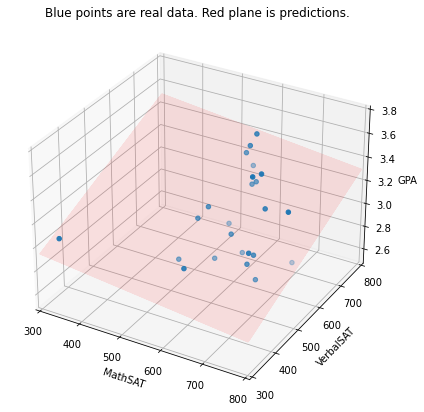

In [16]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X['MathSAT'], X['VerbalSAT'], y)
ax.plot(X_plot_math.ravel(), X_plot_verb.ravel(), y_plot, color='red', alpha=0.1)
ax.set_xlim([300, 800])
ax.set_ylim([300, 800])
ax.set_zlim([2.5, 3.8])
ax.set_xlabel('MathSAT')
ax.set_ylabel('VerbalSAT')
ax.set_zlabel('GPA')
ax.set_title('Blue points are real data. Red plane is predictions.')
plt.show()

In [17]:
lr.coef_

array([-0.00037958,  0.00108557])

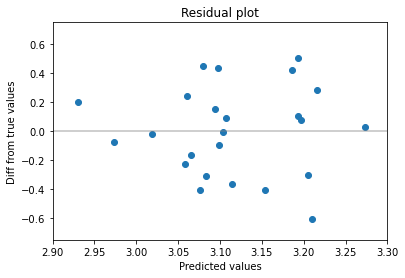

In [18]:
residuals = y - y_hat

_, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(y_hat, residuals)
ax.axhline(0, color='gray', alpha=0.5)
ax.set_ylim([-0.75, 0.75])
ax.set_xlim([2.9, 3.3])
ax.set_title('Residual plot')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Diff from true values')
plt.show()

In [19]:
mean_squared_error(y, y_hat)

0.09053641670931932

### 多層パーセプトロン

In [20]:
import os
import random
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [21]:
def set_random_seed(seed=0):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

In [22]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5, :]

array([[-0.50150633, -1.72986502],
       [ 0.65089119, -0.42131383],
       [ 0.77893536, -0.30235463],
       [ 0.13871452,  0.88723736],
       [ 0.01067035,  0.76827816]])

#### Sequential API

In [23]:
set_random_seed()

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation=None)
])
model.compile(optimizer='adam', loss='mse')

In [25]:
epochs = 5000
history = model.fit(X_scaled, y, epochs=epochs, verbose=0)

In [26]:
history.history['loss'][:10]

[13.953712463378906,
 13.928126335144043,
 13.902603149414062,
 13.877142906188965,
 13.851746559143066,
 13.826712608337402,
 13.80181884765625,
 13.777000427246094,
 13.752257347106934,
 13.727585792541504]

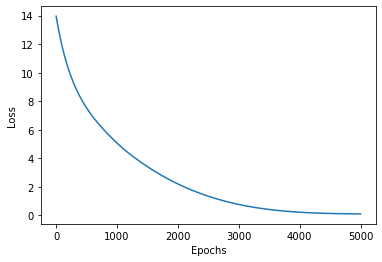

In [27]:
_, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(np.arange(epochs)+1, history.history['loss'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.show()

In [28]:
y_hat = model.predict(X_scaled)
y_hat

1/1 [==============================] - 0s 71ms/step


array([[3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742]], dtype=float32)

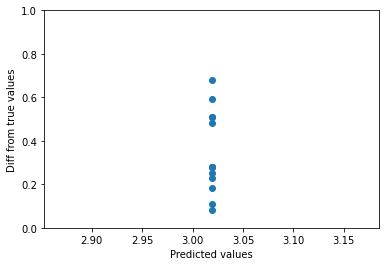

In [29]:
residuals = y - y_hat.ravel()

_, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(y_hat, residuals)
ax.set_ylim([0, 1])
ax.set_xlabel('Predicted values')
ax.set_ylabel('Diff from true values')
plt.show()

In [30]:
mean_squared_error(y, y_hat)

0.10646382341390463

#### Functional API

In [31]:
set_random_seed()

In [32]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(2, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation=None)(x)

In [33]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')

In [34]:
epochs = 5000
history = model.fit(X_scaled, y, epochs=epochs, verbose=0)

In [35]:
y_hat = model.predict(X_scaled)
y_hat

1/1 [==============================] - 0s 37ms/step


array([[3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742],
       [3.0188742]], dtype=float32)

In [36]:
mean_squared_error(y, y_hat)

0.10646382341390463

### 勾配ブースティング

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [38]:
dtrain = xgb.DMatrix(X, label=y)
params = {'objective': 'reg:squarederror'}
num_round = 10

In [39]:
bst = xgb.train(params, dtrain, num_round)

In [40]:
dtest = xgb.DMatrix(X)
y_hat = bst.predict(dtest)

In [41]:
y_hat

array([2.8653526, 2.8653526, 2.856133 , 3.2590904, 3.2590904, 2.8606453,
       2.996611 , 2.8521414, 2.8957167, 2.820493 , 2.9655569, 3.2046025,
       2.8957167, 3.2046025, 2.8957167, 2.9243371, 3.2590904, 3.113385 ,
       2.6298854, 3.033816 , 2.826837 , 3.1451406, 3.2590904, 3.2590904],
      dtype=float32)

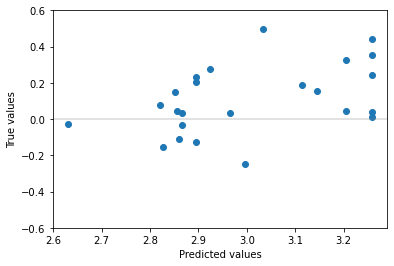

In [42]:
residuals = y - y_hat

_, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(y_hat, residuals)
ax.axhline(0, color='gray', alpha=0.3)
ax.set_ylim([-0.6, 0.6])
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
plt.show()

In [43]:
mean_squared_error(y, y_hat)

0.04629284436052119

#### custom metric を作成

In [44]:
def rmse_custom(y_pred, dtrain):
    y = dtrain.get_label()
    return 'rmse_custom', mean_squared_error(y, y_pred) ** (1/2)

In [45]:
dtrain = xgb.DMatrix(X, label=y)
params = {'objective': 'reg:squarederror'}
num_round = 10

In [46]:
evals_result = {}
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_round,
    feval=rmse_custom,
    evals=[(dtrain, 'dtrain')],
    evals_result=evals_result
)

[0]	dtrain-rmse:1.88862	dtrain-rmse_custom:1.88862
[1]	dtrain-rmse:1.36236	dtrain-rmse_custom:1.36236
[2]	dtrain-rmse:0.99435	dtrain-rmse_custom:0.99435
[3]	dtrain-rmse:0.74098	dtrain-rmse_custom:0.74098
[4]	dtrain-rmse:0.56982	dtrain-rmse_custom:0.56982
[5]	dtrain-rmse:0.44731	dtrain-rmse_custom:0.44731
[6]	dtrain-rmse:0.36194	dtrain-rmse_custom:0.36194
[7]	dtrain-rmse:0.30410	dtrain-rmse_custom:0.30410
[8]	dtrain-rmse:0.25485	dtrain-rmse_custom:0.25485
[9]	dtrain-rmse:0.21516	dtrain-rmse_custom:0.21516
